In [34]:
import requests
import json
import sys
from IPython.display import Image
import base64

In [9]:
# adk_payload = {
#     "app_name": "logo-maker-agent",
#     "user_id": "user12345",
#     "session_id": "session12345",
#     "new_message": {"role": "user", "parts": [{"text": "Hello"}]},
# }

# ADK_API_BASE_URL="http://localhost:8000"

# print(f"{ADK_API_BASE_URL}/apps/{adk_payload['app_name']}/users/{adk_payload['user_id']}/sessions/{adk_payload['session_id']}")
# print('-'*100)
# print(json.dumps(adk_payload, indent=2))
# print('-'*100)

# #Create session:
# response = requests.post(
#         f"{ADK_API_BASE_URL}/apps/{adk_payload['app_name']}/users/{adk_payload['user_id']}/sessions/{adk_payload['session_id']}",
#         headers={"Content-Type": "application/json"},
#         data=json.dumps({})
#     )

# print(response.json())

# print('-'*100)
# print('Sending message to agent')
# print('-'*100)

# response = requests.post(
#         f"{ADK_API_BASE_URL}/run",
#         headers={"Content-Type": "application/json"},
#         data=json.dumps(adk_payload),
#     )

# print(response.json())

User:
I like it, give me one more
Assistant:
Here is the third and final logo design for "RM Perfumes." This concept focuses on a sleek, architectural, and ultra-modern aesthetic.

### Design Analysis:

This logo presents a minimalist yet impactful identity, using geometry and clean lines to convey sophisticated luxury.

*   **Architectural & Geometric Symbol:** The logo features a stylized, three-dimensional cube symbol. This geometric form evokes several powerful concepts:
    *   **Structure and Precision:** The clean lines and sharp angles suggest meticulous craftsmanship and high quality.
    *   **The Perfume Box:** The symbol is a subtle nod to the classic form of a perfume box, reimagined in a modern, abstract way.
    *   **Multi-faceted Nature:** Like a crystal or a gem, the cube's different faces hint at the complex and multi-layered notes within a fragrance.
*   **Cool & Modern Color Palette:** The use of a metallic silver/platinum gradient on a deep navy background creates

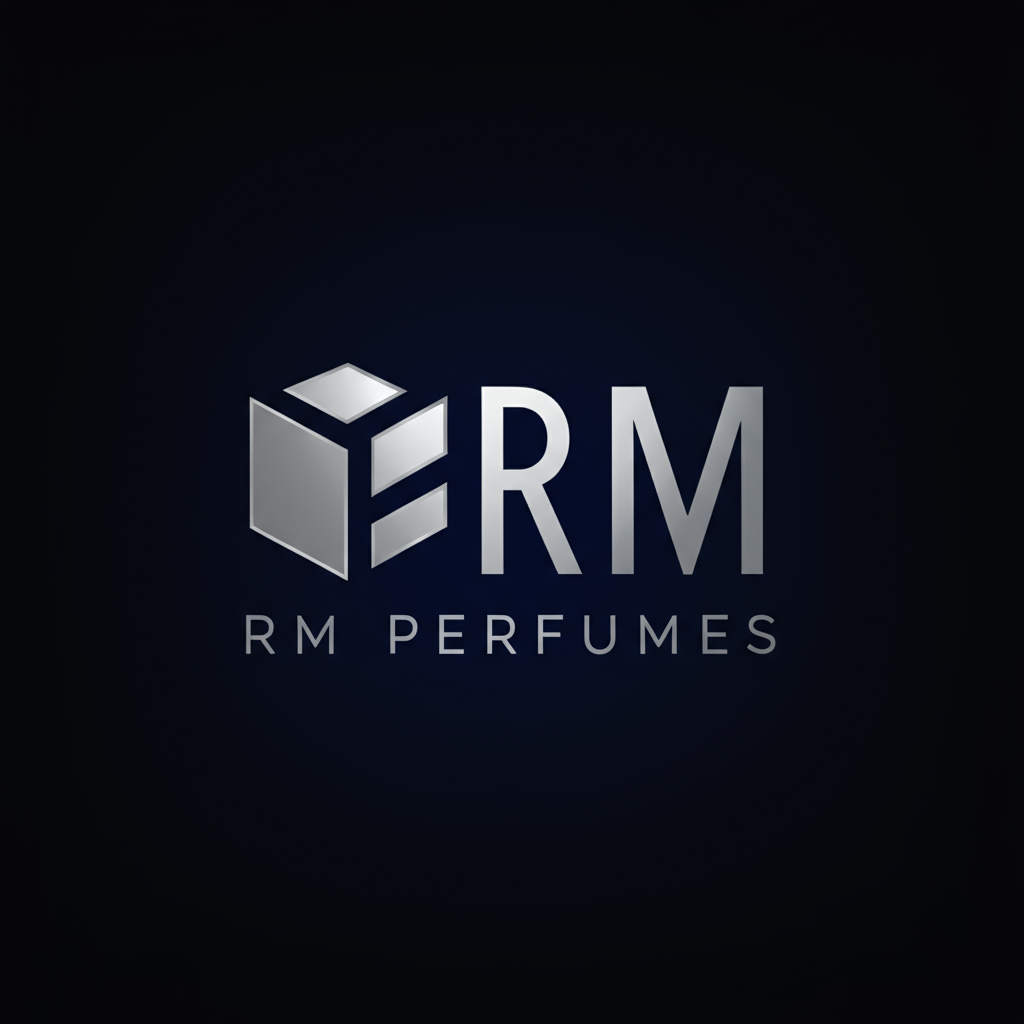

----------------------------------------------------------------------------------------------------


In [35]:
#loop to ask the user for input and send that to the server until the user says bye
app_name = "logo-maker-agent"
user_id = "user12345"
session_id = "session12345"
ADK_API_BASE_URL="http://localhost:8000"

IMAGE_PATH = "./perfume channel.jpeg"


#loop to ask the user for input and send that to the server until the user says bye
while True:
    user_input = input("User:")
    if user_input.lower() == "bye":
        break
    print(f"User:\n{user_input}")

    payload_data = {
        'user_id':user_id,
        'session_id':session_id,
        "user_message": user_input,
    }
    payload_files = {
        # The key 'image_file' must match the parameter name in your FastAPI endpoint.
        # The value is a tuple: (filename, file-like-object, content-type)
        "image_file": (IMAGE_PATH, open(IMAGE_PATH, 'rb'), 'image/jpeg')
    }

    response = requests.post(ADK_API_BASE_URL+'/chat', files=payload_files, data=payload_data)

    if response.status_code != 200:
        print("Error: Status code:", response.status_code)
        print(response.text)
        break

    response_json = response.json()

    print(f"Assistant:\n{response_json['text']}")
    sys.stdout.flush()

    if response_json['image']:
        image_bytes = base64.b64decode(response_json['image'])
        display(Image(image_bytes)) 
    print("-"*100)


In [ ]:
"""
Author: Rohan Mitra (rohan.mitra@dubizzle.com)
client.ipynb (c) 2025
Desc: description
Created:  2025-09-04T09:28:52.902Z
Modified: !date!
"""

